# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

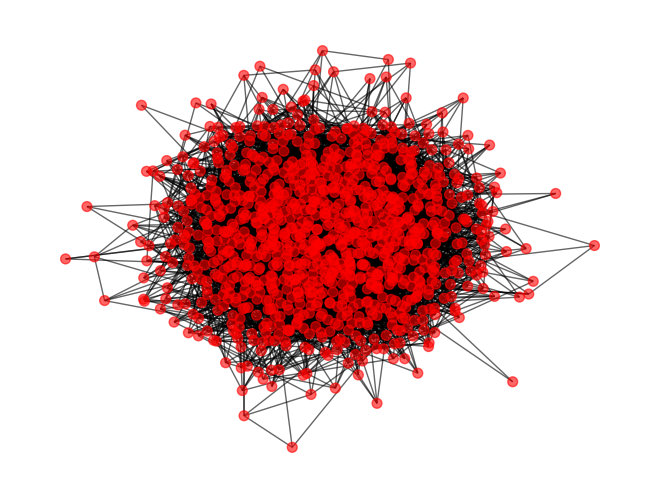

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/1000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  1000 nodes, density:  0.010016016016016016


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{0,
 1,
 4,
 5,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 20,
 22,
 23,
 24,
 28,
 32,
 35,
 37,
 40,
 41,
 43,
 45,
 47,
 50,
 51,
 52,
 53,
 55,
 57,
 58,
 59,
 61,
 62,
 66,
 67,
 68,
 69,
 70,
 74,
 76,
 77,
 79,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 94,
 96,
 100,
 102,
 103,
 106,
 107,
 111,
 112,
 114,
 116,
 120,
 125,
 126,
 127,
 128,
 132,
 133,
 134,
 135,
 137,
 141,
 146,
 147,
 150,
 151,
 152,
 155,
 159,
 161,
 163,
 164,
 165,
 167,
 168,
 169,
 172,
 174,
 176,
 177,
 178,
 180,
 181,
 185,
 189,
 190,
 191,
 192,
 193,
 195,
 198,
 199,
 200,
 203,
 207,
 208,
 210,
 211,
 213,
 214,
 216,
 217,
 218,
 220,
 223,
 224,
 225,
 226,
 229,
 235,
 238,
 240,
 242,
 244,
 245,
 247,
 248,
 251,
 255,
 262,
 263,
 265,
 266,
 270,
 271,
 273,
 274,
 275,
 277,
 278,
 279,
 281,
 283,
 284,
 285,
 287,
 289,
 292,
 295,
 300,
 304,
 305,
 307,
 310,
 312,
 313,
 315,
 316,
 317,
 319,
 322,
 324,
 325,
 326,
 327,
 330,
 332,
 335,
 337,
 339,
 340,
 341,
 342,
 344,
 346,
 347,
 

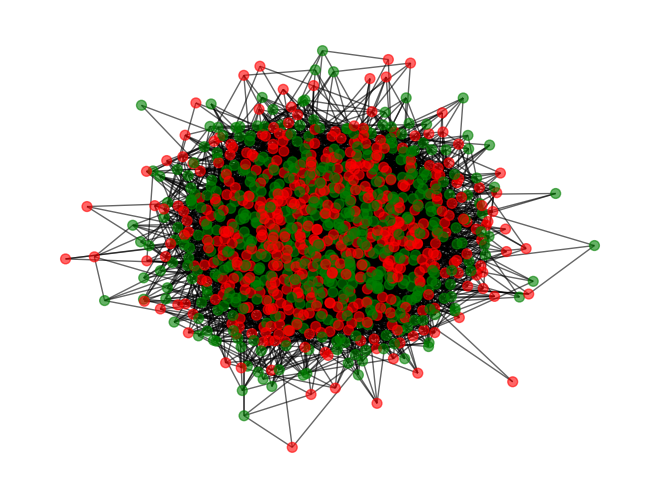

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  3660
